In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import queue as Q

def getPriorityQueue(lst):
    q = Q.PriorityQueue()
    for node in lst:
        q.put(Ordered_Node(heuristics[node], node))
    return q, len(lst)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def greedyBFSUtil(G, v, visited, final_path, dest, goal):
    if goal == 1:
        return goal

    visited[v] = True
    final_path.append(v)

    if v == dest:
        goal = 1
    else:
        pq_list = []
        pq, size = getPriorityQueue(G[v])
        for i in range(size):
            pq_list.append(pq.get().description)

        for i in pq_list:
            if goal != 1 :
              if visited[i] == False:
                  goal = greedyBFSUtil(G, i, visited, final_path, dest, goal)

    return goal


In [ ]:
def greedyBFS(G, source, dest, heuristics, pos):
    visited = {}  # Initialize the visited dictionary
    for node in G.nodes():
        visited[node] = False
    final_path = []
    goal = greedyBFSUtil(G, source, visited, final_path, dest, 0)  # Assuming this is a valid function call
    prev = -1
    for var in final_path:
        if prev != -1:
            curr = var
            nx.draw_networkx_edges(G, pos, edgelist=[(prev, curr)], width=2.5, alpha=0.8, edge_color='black')  # Fixed the syntax error
            prev = curr
        else:
            prev = var
    return


class Ordered_Node(object):
    def __init__(self, priority, description):
        self.priority = priority
        self.description = description


    def __lt__(self, other):
        return self.priority < other.priority


In [ ]:
import networkx as nx

def getHeuristics(G):
    heuristics = {}
    f = open('/content/drive/MyDrive/AI LABS/LAB_4_heuristics.txt')
    for i in G.nodes():
        node_heuristic_val = f.readline().split()
        heuristics[node_heuristic_val[0]] = node_heuristic_val[1]
    return heuristics

def CreateGraph():
    G = nx.Graph()
    f = open('/content/drive/MyDrive/AI LABS/LAB_4_input.txt')
    n = int(f.readline())
    for i in range(n):
        graph_edge_list = f.readline().split()
        G.add_edge(graph_edge_list[0], graph_edge_list[1], length=int(graph_edge_list[2]))
    source, dest = f.read().splitlines()
    return G, source, dest


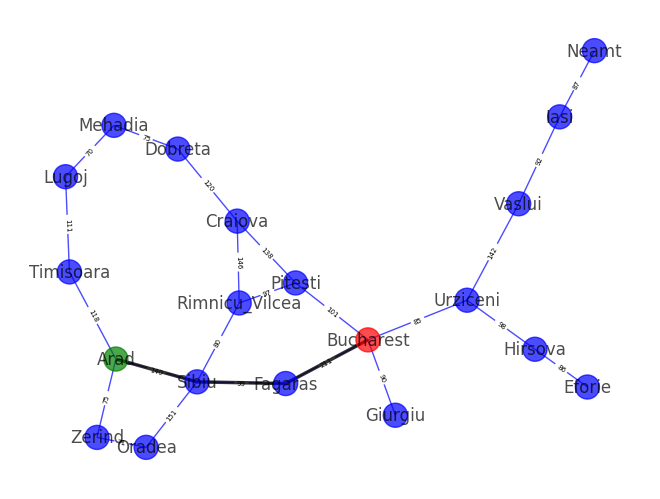

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def DrawPath(G, source, dest):
    pos = nx.spring_layout(G)
    val_map = {}
    val_map[source] = 'green'
    val_map[dest] = 'red'
    values = [val_map.get(node, 'blue') for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=values, edge_color='b', width=1, alpha=0.7)
    edge_labels = dict([((u, v,), d['length']) for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=5)
    return pos

if __name__ == "__main__":
    G, source, dest = CreateGraph()
    heuristics = getHeuristics(G)
    pos = DrawPath(G, source, dest)
    greedyBFS(G, source, dest, heuristics, pos)
    plt.show()


### Question 1

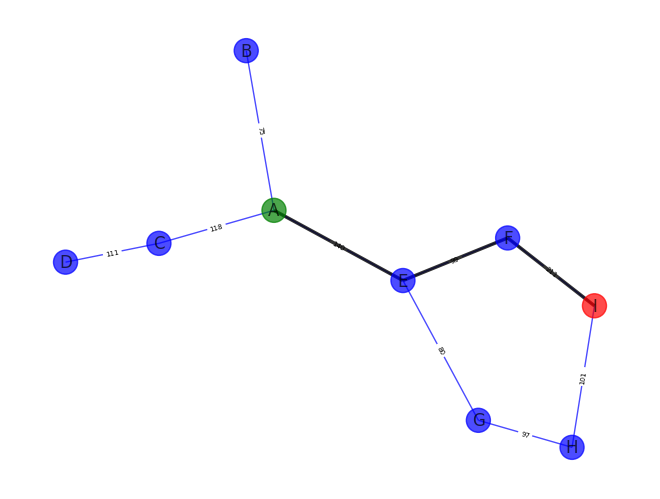

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import queue as Q

def getPriorityQueue(lst):
    q = Q.PriorityQueue()
    for node in lst:
        q.put(Ordered_Node(heuristics[node], node))
    return q, len(lst)
def greedyBFSUtil(G, v, visited, final_path, dest, goal):
    if goal == 1:
        return goal

    visited[v] = True
    final_path.append(v)

    if v == dest:
        goal = 1
    else:
        pq_list = []
        pq, size = getPriorityQueue(G[v])
        for i in range(size):
            pq_list.append(pq.get().description)

        for i in pq_list:
            if goal != 1 :
              if visited[i] == False:
                  goal = greedyBFSUtil(G, i, visited, final_path, dest, goal)

    return goal
def greedyBFS(G, source, dest, heuristics, pos):
    visited = {}  # Initialize the visited dictionary
    for node in G.nodes():
        visited[node] = False
    final_path = []
    goal = greedyBFSUtil(G, source, visited, final_path, dest, 0)  # Assuming this is a valid function call
    prev = -1
    for var in final_path:
        if prev != -1:
            curr = var
            nx.draw_networkx_edges(G, pos, edgelist=[(prev, curr)], width=2.5, alpha=0.8, edge_color='black')  # Fixed the syntax error
            prev = curr
        else:
            prev = var
    return


class Ordered_Node(object):
    def __init__(self, priority, description):
        self.priority = priority
        self.description = description


    def __lt__(self, other):
        return self.priority < other.priority
import networkx as nx

def getHeuristics(G):
    heuristics = {}
    f = open('/content/drive/MyDrive/AI LABS/Exercise_Ques_1_heuristics.txt')
    for i in G.nodes():
        node_heuristic_val = f.readline().split()
        heuristics[node_heuristic_val[0]] = node_heuristic_val[1]
    return heuristics

def CreateGraph():
    G = nx.Graph()
    f = open('/content/drive/MyDrive/AI LABS/Exercise_Ques_1_input.txt')
    n = int(f.readline())
    for i in range(n):
        graph_edge_list = f.readline().split()
        G.add_edge(graph_edge_list[0], graph_edge_list[1], length=int(graph_edge_list[2]))
    source, dest = f.read().splitlines()
    return G, source, dest

def DrawPath(G, source, dest):
    pos = nx.spring_layout(G)
    val_map = {}
    val_map[source] = 'green'
    val_map[dest] = 'red'
    values = [val_map.get(node, 'blue') for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=values, edge_color='b', width=1, alpha=0.7)
    edge_labels = dict([((u, v,), d['length']) for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=5)
    return pos

if __name__ == "__main__":
    G, source, dest = CreateGraph()
    heuristics = getHeuristics(G)
    pos = DrawPath(G, source, dest)
    greedyBFS(G, source, dest, heuristics, pos)
    plt.show()

### Question 2

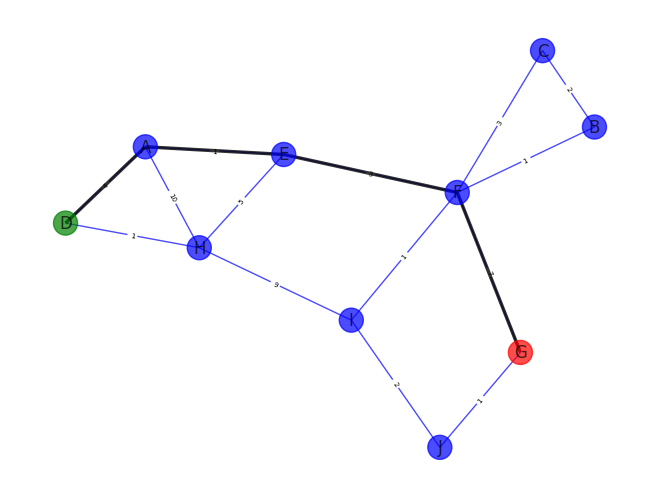

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import queue as Q

def getPriorityQueue(lst):
    q = Q.PriorityQueue()
    for node in lst:
        q.put(Ordered_Node(heuristics[node], node))
    return q, len(lst)
def greedyBFSUtil(G, v, visited, final_path, dest, goal):
    if goal == 1:
        return goal

    visited[v] = True
    final_path.append(v)

    if v == dest:
        goal = 1
    else:
        pq_list = []
        pq, size = getPriorityQueue(G[v])
        for i in range(size):
            pq_list.append(pq.get().description)

        for i in pq_list:
            if goal != 1 :
              if visited[i] == False:
                  goal = greedyBFSUtil(G, i, visited, final_path, dest, goal)

    return goal
def greedyBFS(G, source, dest, heuristics, pos):
    visited = {}  # Initialize the visited dictionary
    for node in G.nodes():
        visited[node] = False
    final_path = []
    goal = greedyBFSUtil(G, source, visited, final_path, dest, 0)  # Assuming this is a valid function call
    prev = -1
    for var in final_path:
        if prev != -1:
            curr = var
            nx.draw_networkx_edges(G, pos, edgelist=[(prev, curr)], width=2.5, alpha=0.8, edge_color='black')  # Fixed the syntax error
            prev = curr
        else:
            prev = var
    return


class Ordered_Node(object):
    def __init__(self, priority, description):
        self.priority = priority
        self.description = description


    def __lt__(self, other):
        return self.priority < other.priority
import networkx as nx

def getHeuristics(G):
    heuristics = {}
    f = open('/content/drive/MyDrive/AI LABS/Exercise_Ques_2_heuristics.txt')
    for i in G.nodes():
        node_heuristic_val = f.readline().split()
        heuristics[node_heuristic_val[0]] = node_heuristic_val[1]
    return heuristics

def CreateGraph():
    G = nx.Graph()
    f = open('/content/drive/MyDrive/AI LABS/Exercise_Ques_2_input.txt')
    n = int(f.readline())
    for i in range(n):
        graph_edge_list = f.readline().split()
        G.add_edge(graph_edge_list[0], graph_edge_list[1], length=int(graph_edge_list[2]))
    source, dest = f.read().splitlines()
    return G, source, dest

def DrawPath(G, source, dest):
    pos = nx.spring_layout(G)
    val_map = {}
    val_map[source] = 'green'
    val_map[dest] = 'red'
    values = [val_map.get(node, 'blue') for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=values, edge_color='b', width=1, alpha=0.7)
    edge_labels = dict([((u, v,), d['length']) for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=5)
    return pos

if __name__ == "__main__":
    G, source, dest = CreateGraph()
    heuristics = getHeuristics(G)
    pos = DrawPath(G, source, dest)
    greedyBFS(G, source, dest, heuristics, pos)
    plt.show()

### Question 3

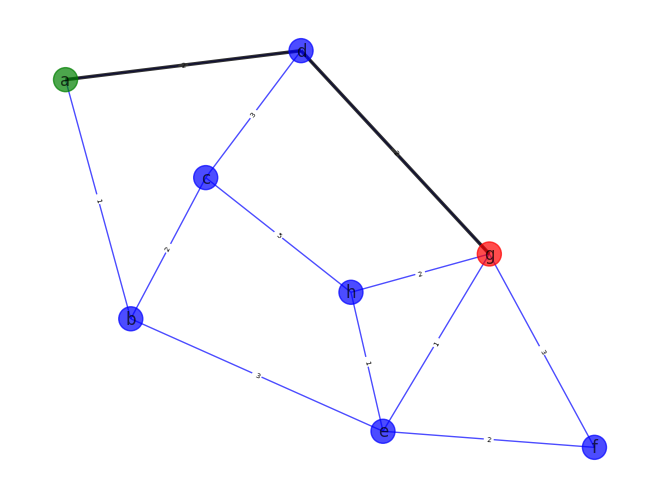

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import queue as Q

def getPriorityQueue(lst):
    q = Q.PriorityQueue()
    for node in lst:
        q.put(Ordered_Node(heuristics[node], node))
    return q, len(lst)
def greedyBFSUtil(G, v, visited, final_path, dest, goal):
    if goal == 1:
        return goal

    visited[v] = True
    final_path.append(v)

    if v == dest:
        goal = 1
    else:
        pq_list = []
        pq, size = getPriorityQueue(G[v])
        for i in range(size):
            pq_list.append(pq.get().description)

        for i in pq_list:
            if goal != 1 :
              if visited[i] == False:
                  goal = greedyBFSUtil(G, i, visited, final_path, dest, goal)

    return goal
def greedyBFS(G, source, dest, heuristics, pos):
    visited = {}  # Initialize the visited dictionary
    for node in G.nodes():
        visited[node] = False
    final_path = []
    goal = greedyBFSUtil(G, source, visited, final_path, dest, 0)  # Assuming this is a valid function call
    prev = -1
    for var in final_path:
        if prev != -1:
            curr = var
            nx.draw_networkx_edges(G, pos, edgelist=[(prev, curr)], width=2.5, alpha=0.8, edge_color='black')  # Fixed the syntax error
            prev = curr
        else:
            prev = var
    return


class Ordered_Node(object):
    def __init__(self, priority, description):
        self.priority = priority
        self.description = description


    def __lt__(self, other):
        return self.priority < other.priority
import networkx as nx

def getHeuristics(G):
    heuristics = {}
    f = open('/content/drive/MyDrive/AI LABS/Exercise_Ques_3_heuristics.txt')
    for i in G.nodes():
        node_heuristic_val = f.readline().split()
        heuristics[node_heuristic_val[0]] = node_heuristic_val[1]
    return heuristics

def CreateGraph():
    G = nx.Graph()
    f = open('/content/drive/MyDrive/AI LABS/Exercise_Ques_3_input.txt')
    n = int(f.readline())
    for i in range(n):
        graph_edge_list = f.readline().split()
        G.add_edge(graph_edge_list[0], graph_edge_list[1], length=int(graph_edge_list[2]))
    source, dest = f.read().splitlines()
    return G, source, dest

def DrawPath(G, source, dest):
    pos = nx.spring_layout(G)
    val_map = {}
    val_map[source] = 'green'
    val_map[dest] = 'red'
    values = [val_map.get(node, 'blue') for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=values, edge_color='b', width=1, alpha=0.7)
    edge_labels = dict([((u, v,), d['length']) for u, v, d in G.edges(data=True)])
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.5, font_size=5)
    return pos

if __name__ == "__main__":
    G, source, dest = CreateGraph()
    heuristics = getHeuristics(G)
    pos = DrawPath(G, source, dest)
    greedyBFS(G, source, dest, heuristics, pos)
    plt.show()